# Weather data
In Singapore, Jurong West, from the months of July 2020 to April 2021

data taken from http://www.weather.gov.sg/climate-historical-daily/

In [37]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In [17]:
jul20 = pd.read_csv('jul2020.csv')
aug20 = pd.read_csv('aug2020.csv')
sep20 = pd.read_csv('sep2020.csv')
oct20 = pd.read_csv('oct2020.csv')
nov20 = pd.read_csv('nov2020.csv')
dec20 = pd.read_csv('dec2020.csv')
jan21 = pd.read_csv('jan2021.csv')
feb21 = pd.read_csv('feb2021.csv')
mar21 = pd.read_csv('mar2021.csv')
apr21 = pd.read_csv('apr2021.csv')

In [35]:
# join the dataframes into a main dataframe
weather = pd.concat([jul20, aug20, sep20, oct20, nov20, dec20, jan21, feb21, mar21, apr21]).reset_index(drop=True)
weather

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Jurong (West),2020,7,1,0.0,0.0,0.0,0.0,28.8,31.5,27.9,7.8,27.0
1,Jurong (West),2020,7,2,0.0,0.0,0.0,0.0,29.0,31.9,27.3,9.7,30.9
2,Jurong (West),2020,7,3,0.0,0.0,0.0,0.0,29.2,32.1,28.0,9.3,30.9
3,Jurong (West),2020,7,4,54.4,43.6,53.4,54.4,28.2,32.0,21.4,8.8,32.4
4,Jurong (West),2020,7,5,37.4,33.4,37.2,37.2,27.0,32.6,22.4,6.2,60.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Jurong (West),2021,4,26,30.8,15.200000,21.400000,22.600000,26.6,32.8,23.4,4.8,29.4
300,Jurong (West),2021,4,27,2.4,1.600000,2.000000,2.000000,26.8,32.8,24.7,4.9,19.8
301,Jurong (West),2021,4,28,2.2,1.000000,1.400000,2.200000,27.6,31.3,25.0,5.6,25.6
302,Jurong (West),2021,4,29,0.2,0.200000,0.200000,0.200000,27.9,35.1,25.5,5.7,30.9


In [36]:
# compile in a single datetime column
def make_datetime(y, m, d):
    if len(str(m)) == 1:
        m = "0" + str(m)
    if len(str(d)) == 1:
        d = "0" + str(d)
    
    dt = str(y) + "-" + str(m) + "-" + str(d)
    return pd.to_datetime(dt)


col = weather.apply(lambda row: make_datetime(row["Year"], row["Month"], row["Day"]), axis=1)
weather = weather.assign(Year = col.values)

weather.drop(columns=['Month', 'Day'], inplace=True)
weather.rename(columns={'Year':'datetime'}, inplace=True)

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Station                        304 non-null    object        
 1   datetime                       304 non-null    datetime64[ns]
 2   Daily Rainfall Total (mm)      304 non-null    float64       
 3   Highest 30 min Rainfall (mm)   304 non-null    object        
 4   Highest 60 min Rainfall (mm)   304 non-null    object        
 5   Highest 120 min Rainfall (mm)  304 non-null    object        
 6   Mean Temperature (°C)          304 non-null    float64       
 7   Maximum Temperature (°C)       304 non-null    float64       
 8   Minimum Temperature (°C)       304 non-null    float64       
 9   Mean Wind Speed (km/h)         304 non-null    float64       
 10  Max Wind Speed (km/h)          304 non-null    float64       
dtypes: datetime64[ns](1

In [114]:
# convert to float
weather[['Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']] = weather[['Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']].apply(pd.to_numeric, errors="coerce", axis=1)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Station                        304 non-null    object        
 1   datetime                       304 non-null    datetime64[ns]
 2   Daily Rainfall Total (mm)      304 non-null    float64       
 3   Highest 30 min Rainfall (mm)   303 non-null    float64       
 4   Highest 60 min Rainfall (mm)   303 non-null    float64       
 5   Highest 120 min Rainfall (mm)  303 non-null    float64       
 6   Mean Temperature (°C)          304 non-null    float64       
 7   Maximum Temperature (°C)       304 non-null    float64       
 8   Minimum Temperature (°C)       304 non-null    float64       
 9   Mean Wind Speed (km/h)         304 non-null    float64       
 10  Max Wind Speed (km/h)          304 non-null    float64       
dtypes: datetime64[ns](1

<AxesSubplot:>

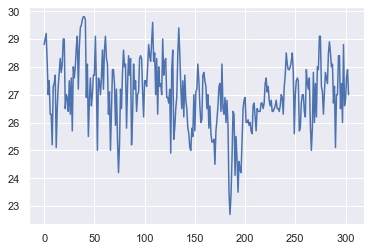

In [41]:
# test plot
weather["Mean Temperature (°C)"].plot()

In [115]:
# pair months
df1 = weather.loc[:61,:]
df2 = weather.loc[62:122,:]
df3 = weather.loc[123:183,:]
df4 = weather.loc[184:242,:]
df5 = weather.loc[243:,:]

## Rainfall

* Daily Rainfall Total (mm)
* Highest 30 min Rainfall (mm)
* Highest 60 min Rainfall (mm)
* Highest 120 min Rainfall (mm)

### Daily Rainfall Total (mm)

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

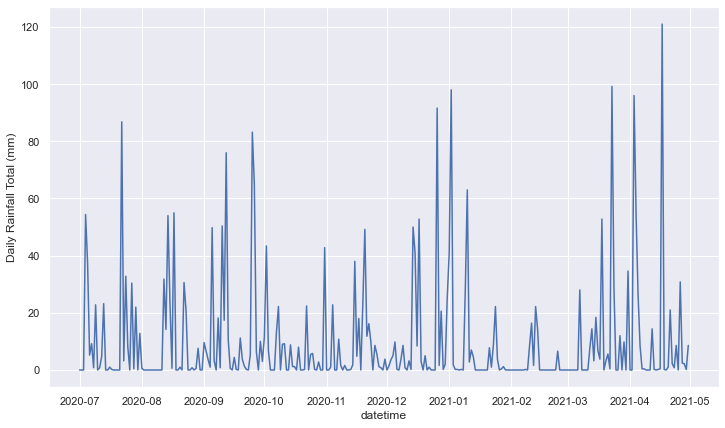

In [94]:
# overall
rainfall = weather[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(12, 7))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

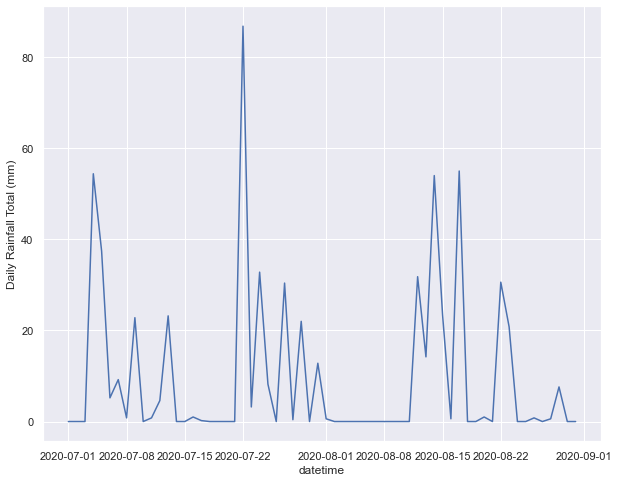

In [95]:
rainfall = df1[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

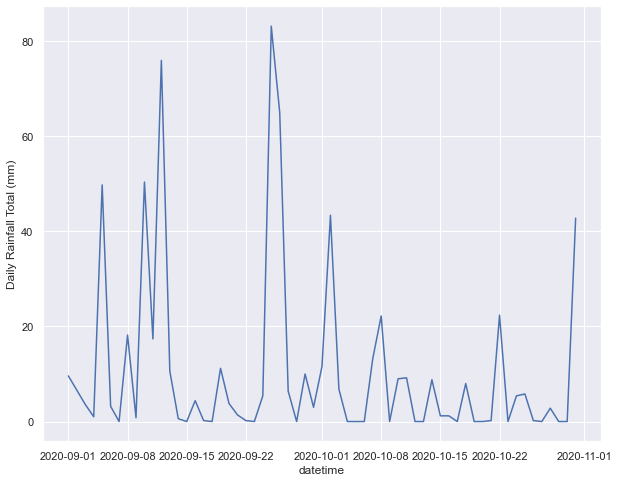

In [96]:
rainfall = df2[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

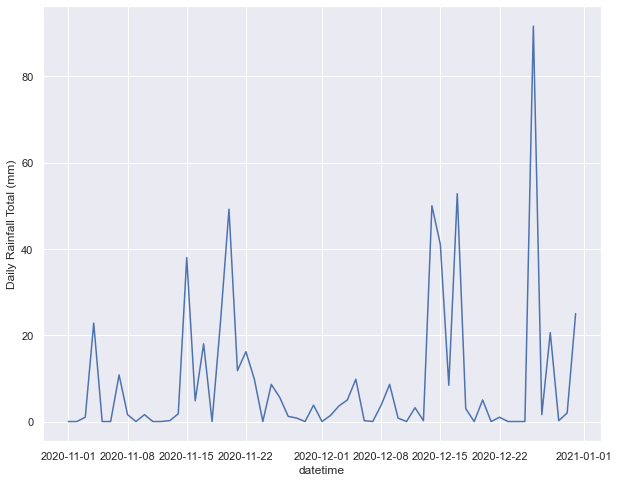

In [97]:
rainfall = df3[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

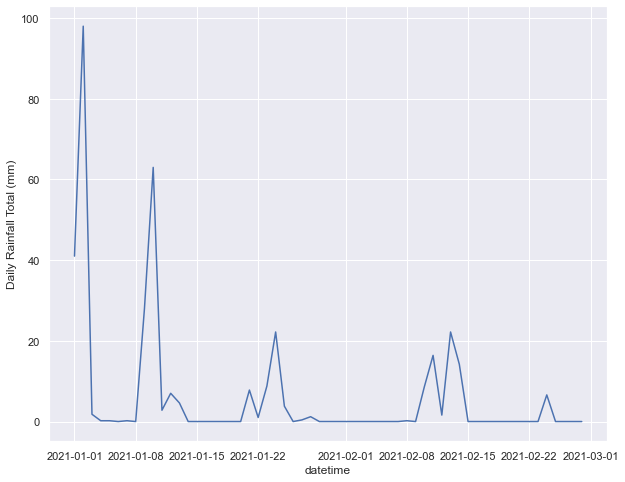

In [98]:
rainfall = df4[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Daily Rainfall Total (mm)'>

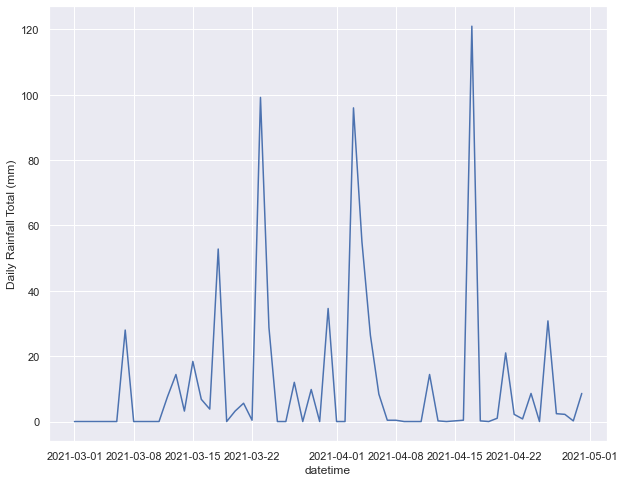

In [99]:
rainfall = df5[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Daily Rainfall Total (mm)")

### Highest 30 min Rainfall (mm)

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

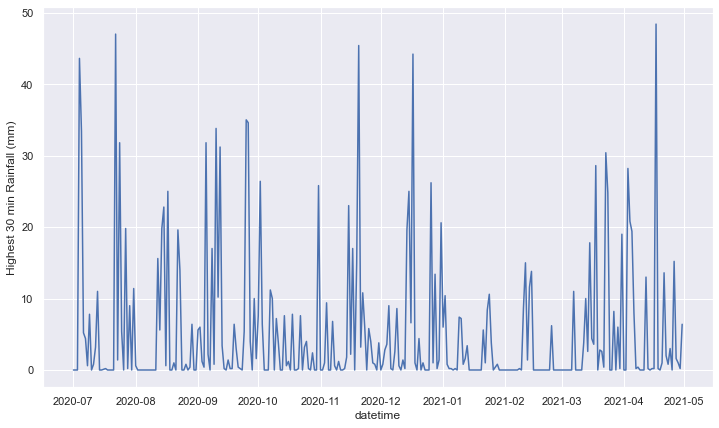

In [116]:
# overall
rainfall = weather[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(12, 7))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

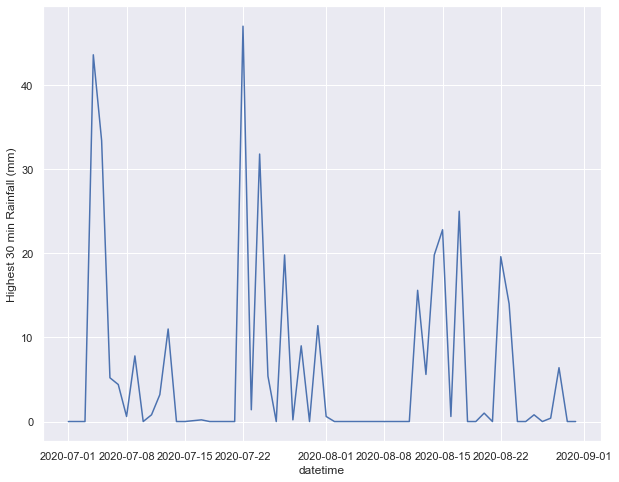

In [117]:
rainfall = df1[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

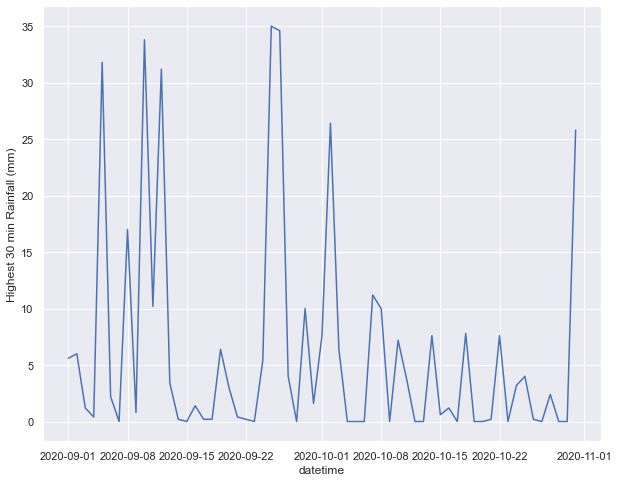

In [118]:
rainfall = df2[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

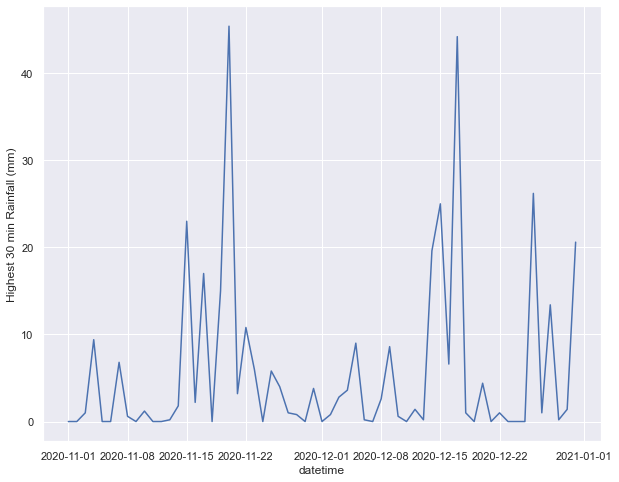

In [119]:
rainfall = df3[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

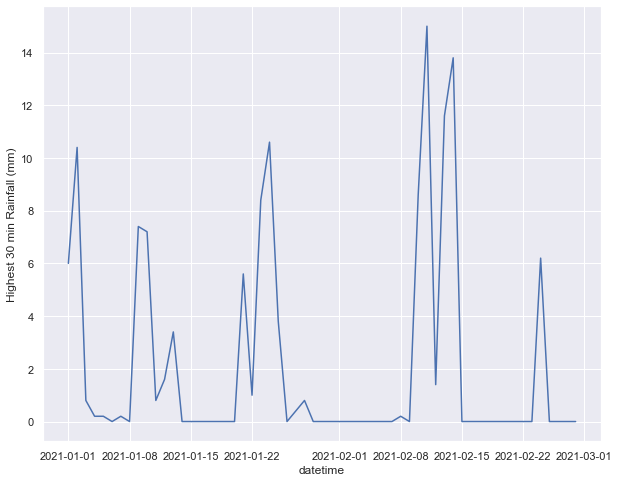

In [120]:
rainfall = df4[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 30 min Rainfall (mm)'>

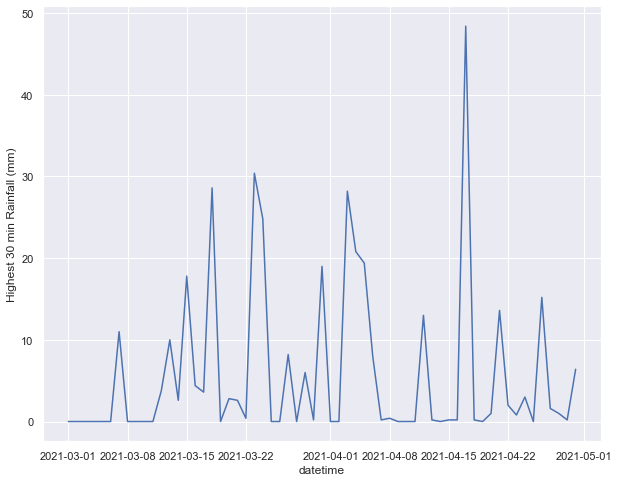

In [121]:
rainfall = df5[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 30 min Rainfall (mm)")

### Highest 60 min Rainfall (mm)

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

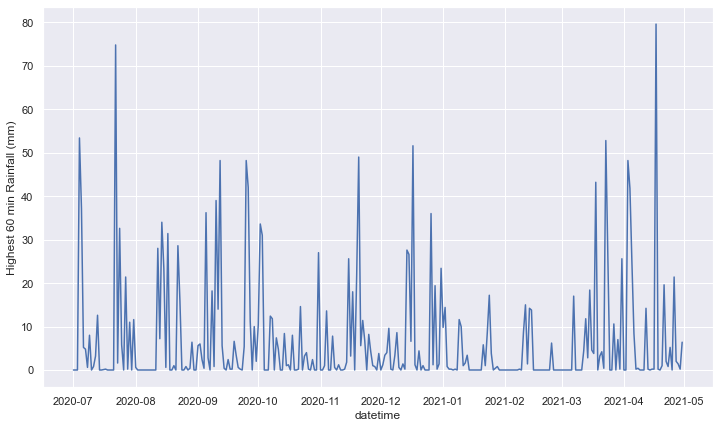

In [122]:
# overall
rainfall = weather[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(12, 7))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

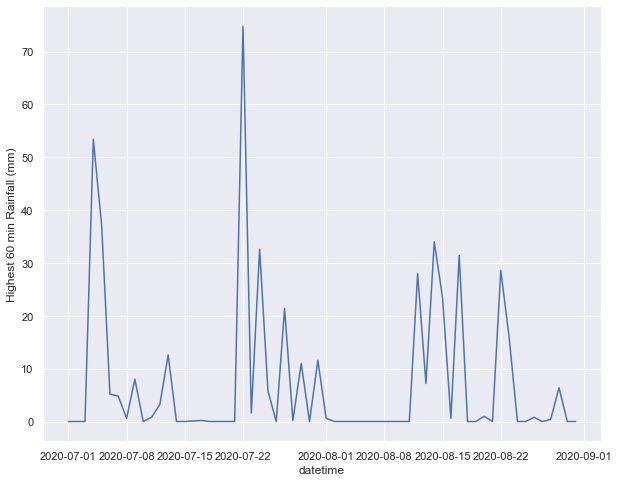

In [123]:
rainfall = df1[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

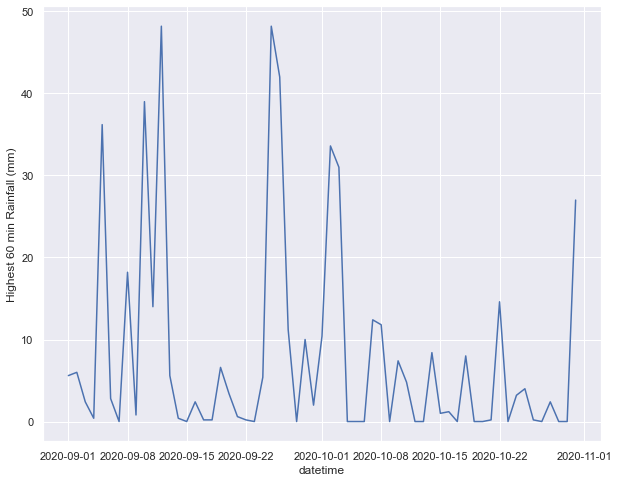

In [124]:
rainfall = df2[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

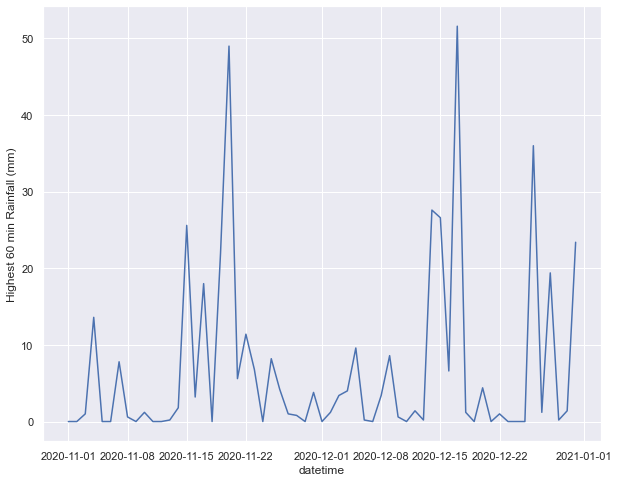

In [125]:
rainfall = df3[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

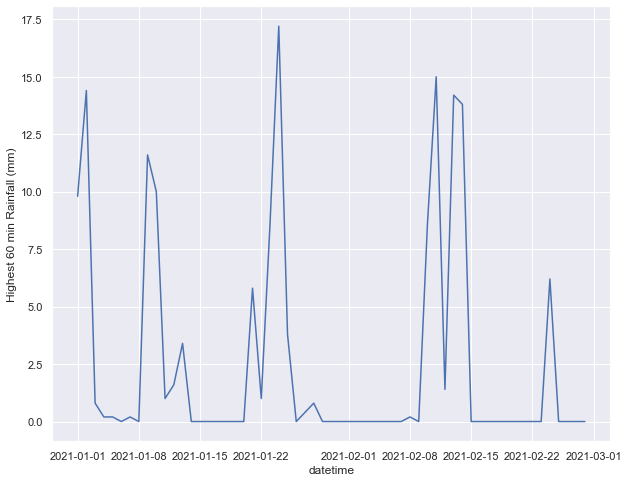

In [126]:
rainfall = df4[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 60 min Rainfall (mm)'>

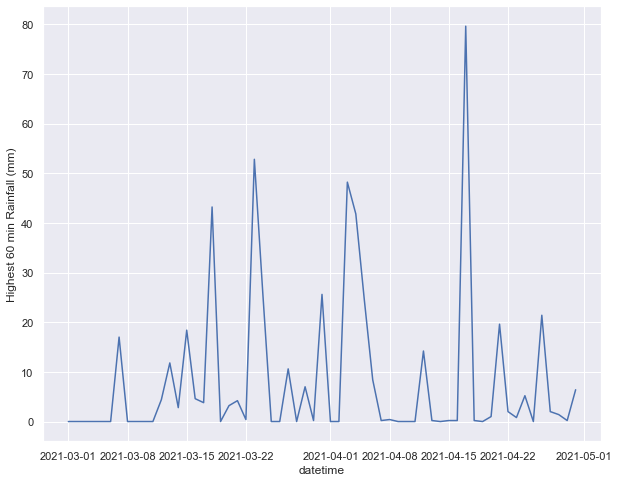

In [127]:
rainfall = df5[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 60 min Rainfall (mm)")

### Highest 120 min Rainfall (mm)

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

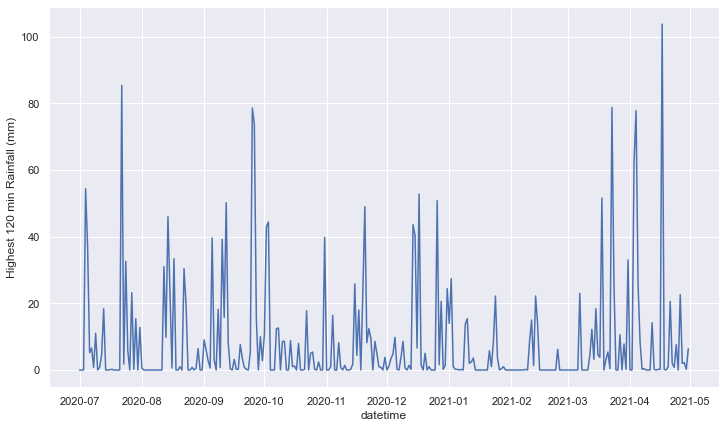

In [128]:
# overall
rainfall = weather[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(12, 7))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

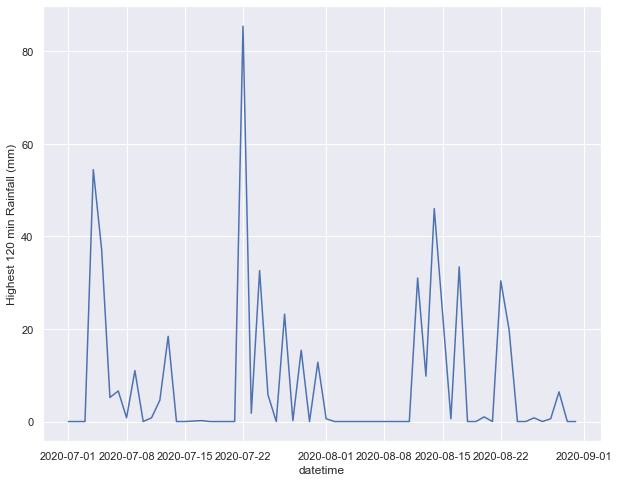

In [129]:
rainfall = df1[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

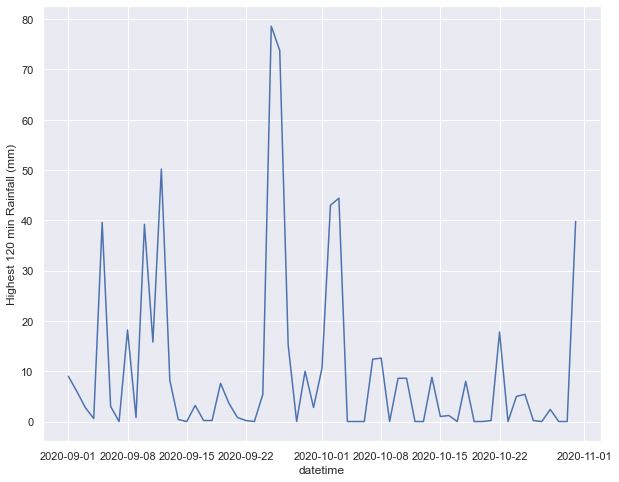

In [130]:
rainfall = df2[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

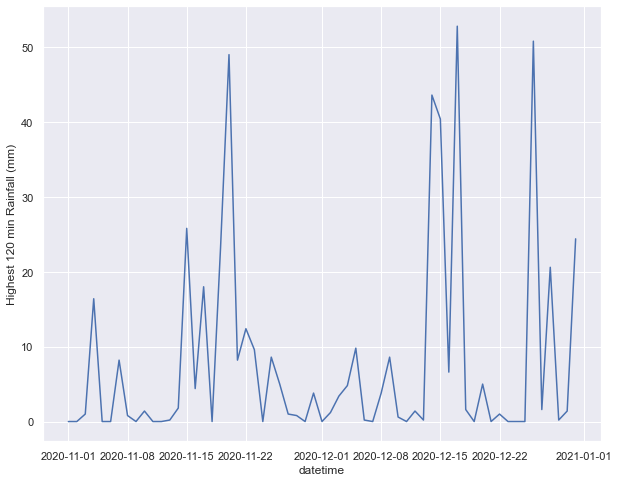

In [131]:
rainfall = df3[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

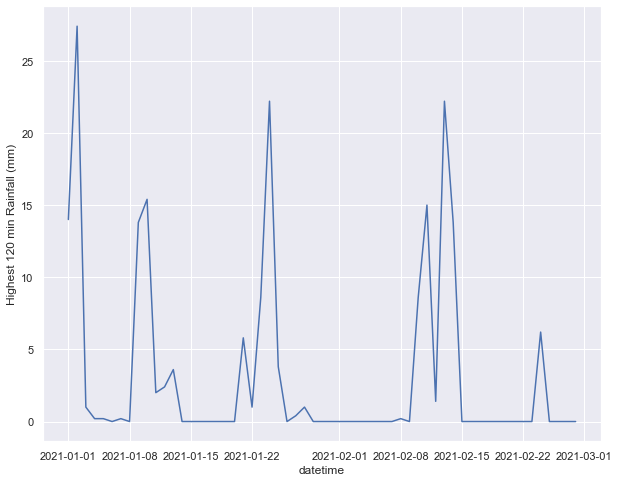

In [132]:
rainfall = df4[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

<AxesSubplot:xlabel='datetime', ylabel='Highest 120 min Rainfall (mm)'>

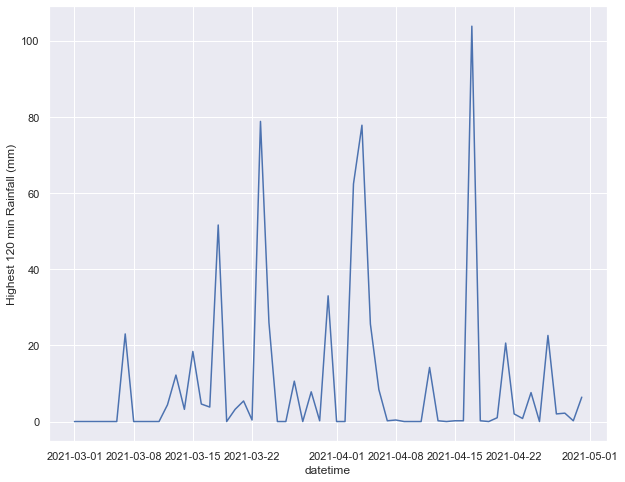

In [133]:
rainfall = df5[['datetime', 'Daily Rainfall Total (mm)', 'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)', 'Highest 120 min Rainfall (mm)']]

f = plt.figure(figsize=(10, 8))
sb.lineplot(data=rainfall, x = "datetime", y = "Highest 120 min Rainfall (mm)")

## Temperature

* Mean Temperature (°C)
* Maximum Temperature (°C)
* Minimum Temperature (°C)

### Mean Temperature (°C)

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

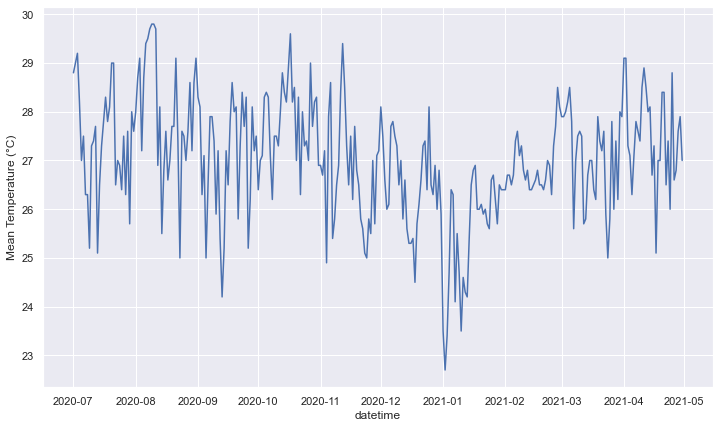

In [74]:
# overall
f = plt.figure(figsize=(12, 7))
sb.lineplot(data=weather, x = "datetime", y = "Mean Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

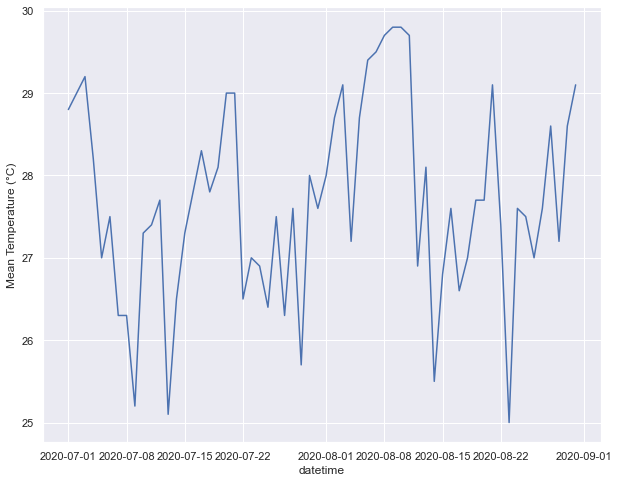

In [75]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df1, x = "datetime", y = "Mean Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

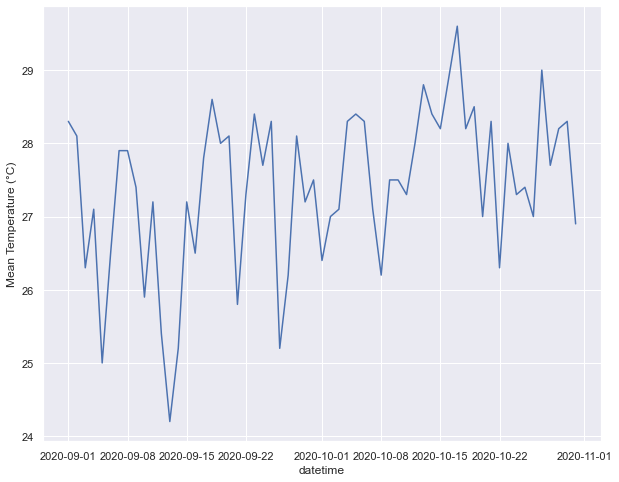

In [76]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df2, x = "datetime", y = "Mean Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

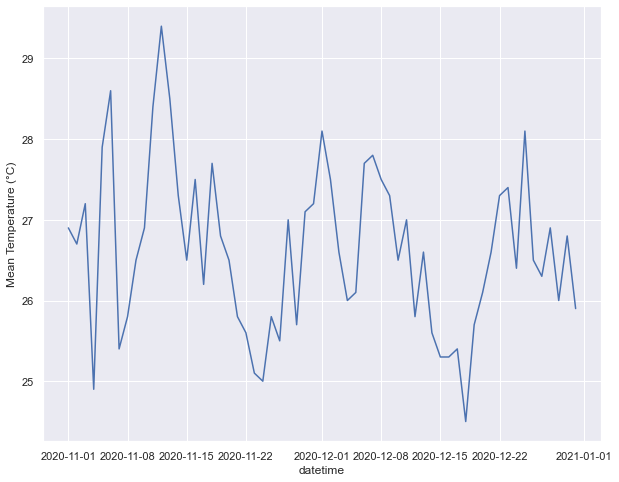

In [77]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df3, x = "datetime", y = "Mean Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

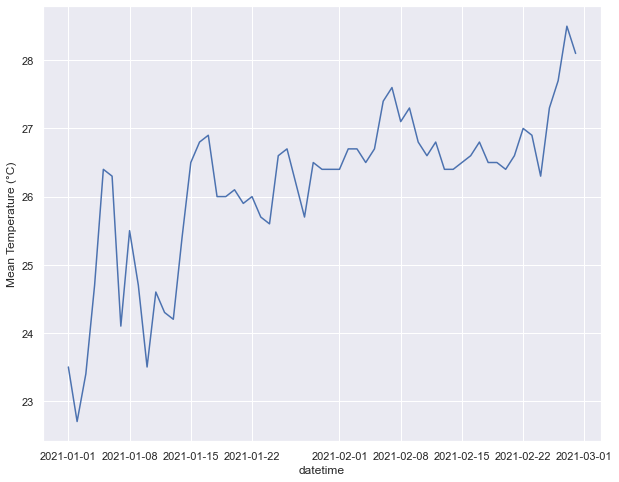

In [78]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df4, x = "datetime", y = "Mean Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Mean Temperature (°C)'>

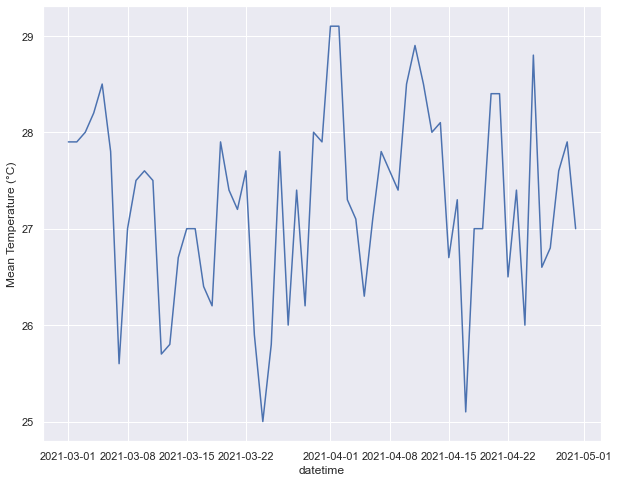

In [79]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df5, x = "datetime", y = "Mean Temperature (°C)")

### Maximum Temperature (°C)

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

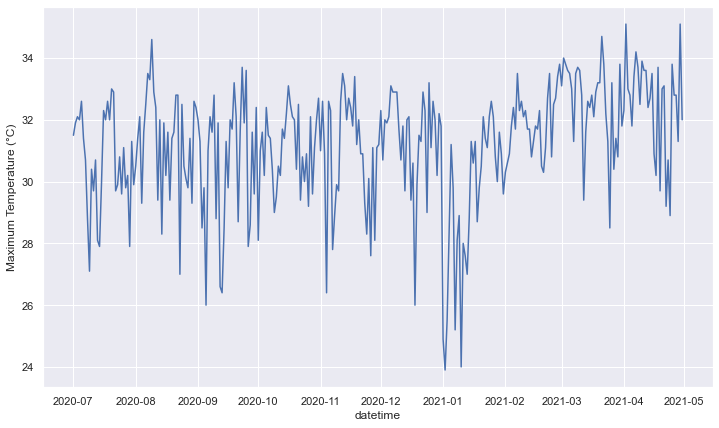

In [135]:
# overall
f = plt.figure(figsize=(12, 7))
sb.lineplot(data=weather, x = "datetime", y = "Maximum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

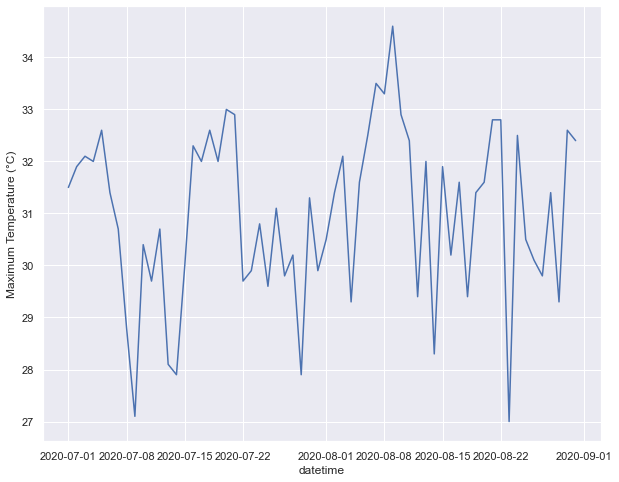

In [134]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df1, x = "datetime", y = "Maximum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

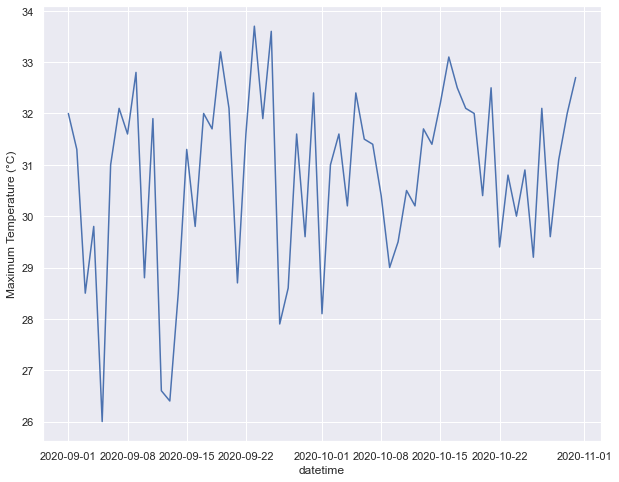

In [136]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df2, x = "datetime", y = "Maximum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

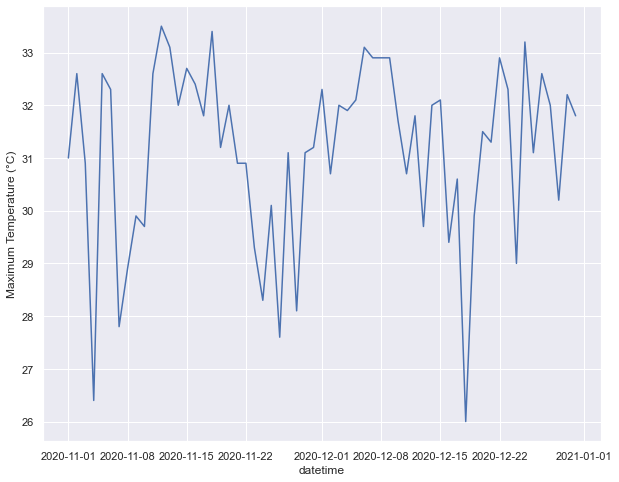

In [137]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df3, x = "datetime", y = "Maximum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

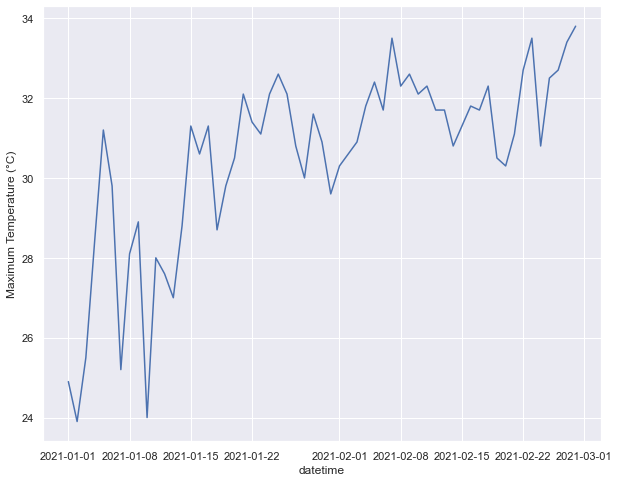

In [138]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df4, x = "datetime", y = "Maximum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Maximum Temperature (°C)'>

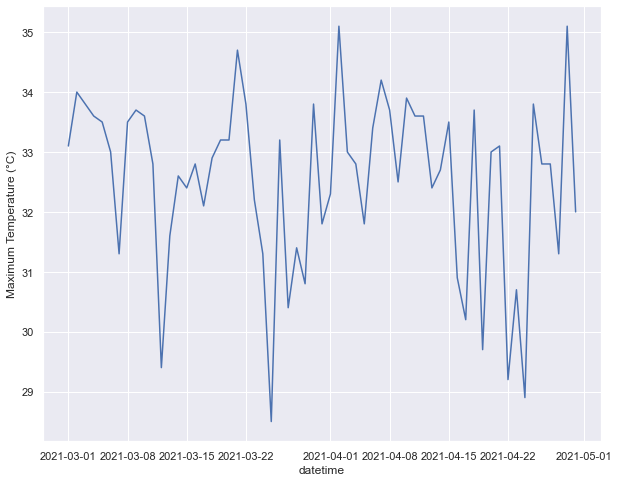

In [139]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df5, x = "datetime", y = "Maximum Temperature (°C)")

### Minimum Temperature (°C)

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

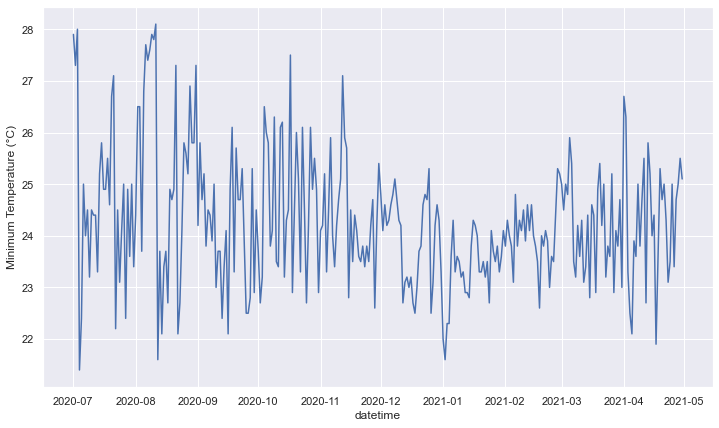

In [140]:
# overall
f = plt.figure(figsize=(12, 7))
sb.lineplot(data=weather, x = "datetime", y = "Minimum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

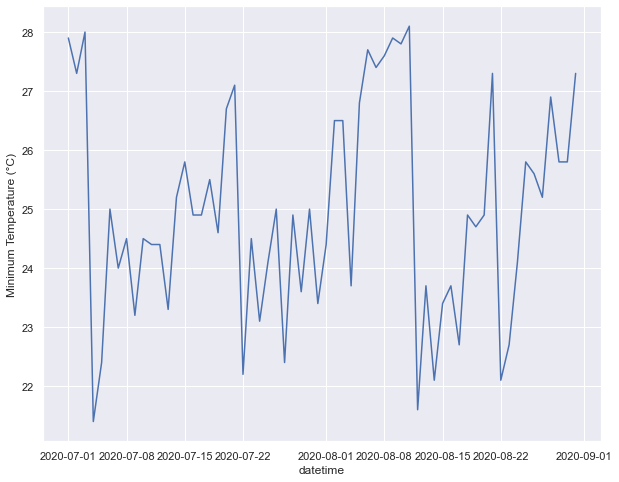

In [141]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df1, x = "datetime", y = "Minimum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

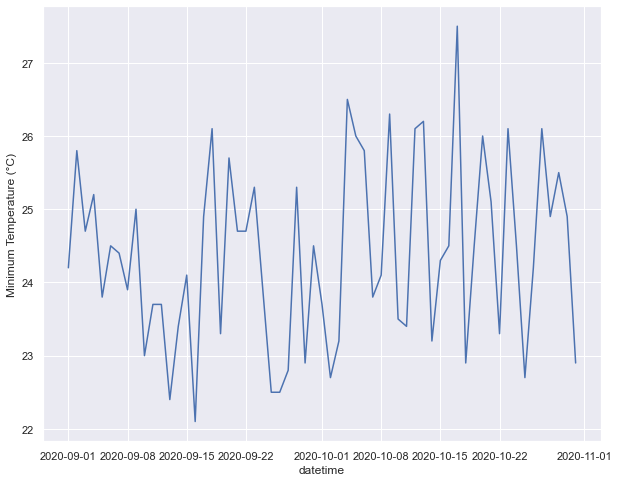

In [142]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df2, x = "datetime", y = "Minimum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

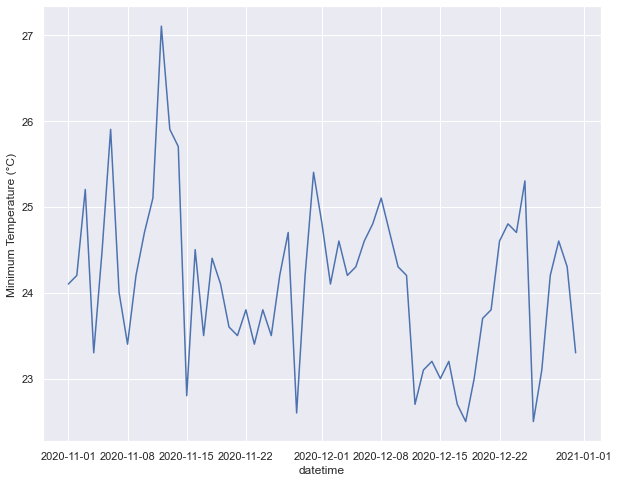

In [143]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df3, x = "datetime", y = "Minimum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

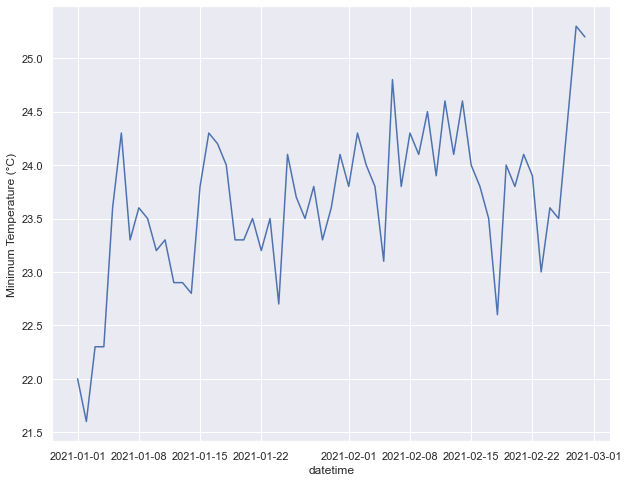

In [144]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df4, x = "datetime", y = "Minimum Temperature (°C)")

<AxesSubplot:xlabel='datetime', ylabel='Minimum Temperature (°C)'>

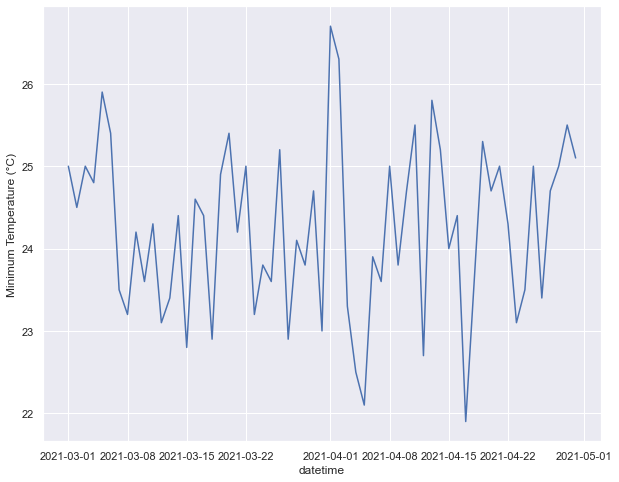

In [145]:
f = plt.figure(figsize=(10, 8))
sb.lineplot(data=df5, x = "datetime", y = "Minimum Temperature (°C)")

## Wind Speed

* Mean Wind Speed (km/h)
* Max Wind Speed (km/h)

In [146]:
# irrelevant